# Facial Landmarks

Facial landmarks are used to localize and represent salient regions of the face, such as:
<ul>
    <li>Eyes</li>
<li>Eyebrows</li>
<li>Nose</li>
<li>Mouth</li>
<li>Jawline</li>
    </ul>
    
The pre-trained facial landmark detector inside the dlib library is used to estimate the location of 68 (x, y)-coordinates that map to facial structures on the face.

In [1]:
import imutils
import dlib
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def rect_to_bb(rect):
    # take a bounding predicted by dlib and convert it
    # to the format (x, y, w, h) as we would normally do
    # with OpenCV
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y

    # return a tuple of (x, y, w, h)
    return (x, y, w, h)

In [3]:
def shape_to_np(shape, dtype="int"):
    # initialize the list of (x, y)-coordinates
    coords = np.zeros((68, 2), dtype=dtype)

    # loop over the 68 facial landmarks and convert them
    # to a 2-tuple of (x, y)-coordinates
    for i in range(0, 68):
        coords[i] = (shape.part(i).x, shape.part(i).y)

    # return the list of (x, y)-coordinates
    return coords

In [4]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("dataset/shape_predictor_68_face_landmarks.dat")

In [5]:
image = cv2.imread("../../dataset/dp.jpeg")
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
# detect faces in the grayscale image
rects = detector(gray, 1)

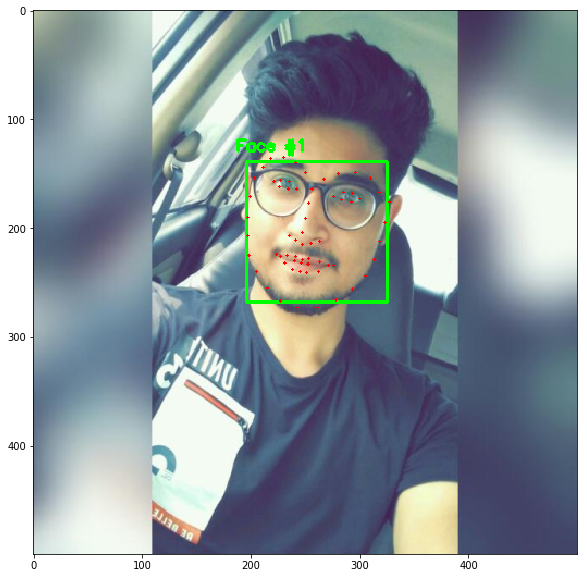

In [6]:
for (i, rect) in enumerate(rects):
    # determine the facial landmarks for the face region, then
    # convert the facial landmark (x, y)-coordinates to a NumPy
    # array
    shape = predictor(gray, rect)
    shape = shape_to_np(shape)

    # convert dlib's rectangle to a OpenCV-style bounding box
    # [i.e., (x, y, w, h)], then draw the face bounding box
    (x, y, w, h) = rect_to_bb(rect)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # show the face number
    cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # loop over the (x, y)-coordinates for the facial landmarks
    # and draw them on the image
    for (x, y) in shape:
        cv2.circle(image, (x, y), 1, (0, 0, 255), -1)

# show the output image with the face detections + facial landmarks
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pixels = np.array(image)
plt.figure(figsize = (300,10))
plt.imshow(image)
# cv2.imshow("Output", image)
# cv2.waitKey(0)

Examining the image, we can see that facial regions can be accessed via simple Python indexing (assuming zero-indexing with Python since the image above is one-indexed):

<img src="https://www.pyimagesearch.com/wp-content/uploads/2017/04/facial_landmarks_68markup-768x619.jpg" height="500" width="400">
<pre>
The mouth can be accessed through points [48, 68].
The right eyebrow through points [17, 22].
The left eyebrow through points [22, 27].
The right eye using [36, 42].
The left eye with [42, 48].
The nose using [27, 35].
And the jaw via [0, 17].

In [7]:
from collections import OrderedDict
FACIAL_LANDMARKS_IDXS = OrderedDict([
    ("mouth", (48, 68)),
    ("right_eyebrow", (17, 22)),
    ("left_eyebrow", (22, 27)),
    ("right_eye", (36, 42)),
    ("left_eye", (42, 48)),
    ("nose", (27, 35)),
    ("jaw", (0, 17))
])

In [8]:
def visualize_facial_landmarks(image, shape, colors=None, alpha=0.75):
    # create two copies of the input image -- one for the
    # overlay and one for the final output image
    overlay = image.copy()
    output = image.copy()

    # if the colors list is None, initialize it with a unique
    # color for each facial landmark region
    if colors is None:
        colors = [(19, 199, 109), (79, 76, 240), (230, 159, 23),
            (168, 100, 168), (158, 163, 32),
            (163, 38, 32), (180, 42, 220)]
    for (i, name) in enumerate(FACIAL_LANDMARKS_IDXS.keys()):
        # grab the (x, y)-coordinates associated with the
        # face landmark
        (j, k) = FACIAL_LANDMARKS_IDXS[name]
        pts = shape[j:k]

        # check if are supposed to draw the jawline
        if name == "jaw":
            # since the jawline is a non-enclosed facial region,
            # just draw lines between the (x, y)-coordinates
            for l in range(1, len(pts)):
                ptA = tuple(pts[l - 1])
                ptB = tuple(pts[l])
                cv2.line(overlay, ptA, ptB, colors[i], 2)

        # otherwise, compute the convex hull of the facial
        # landmark coordinates points and display it
        else:
            hull = cv2.convexHull(pts)
            cv2.drawContours(overlay, [hull], -1, colors[i], -1)
            # loop over the facial landmark regions individually
    for (i, name) in enumerate(FACIAL_LANDMARKS_IDXS.keys()):
        # grab the (x, y)-coordinates associated with the
        # face landmark
        (j, k) = FACIAL_LANDMARKS_IDXS[name]
        pts = shape[j:k]

        # check if are supposed to draw the jawline
        if name == "jaw":
            # since the jawline is a non-enclosed facial region,
            # just draw lines between the (x, y)-coordinates
            for l in range(1, len(pts)):
                ptA = tuple(pts[l - 1])
                ptB = tuple(pts[l])
                cv2.line(overlay, ptA, ptB, colors[i], 2)

        # otherwise, compute the convex hull of the facial
        # landmark coordinates points and display it
        else:
            hull = cv2.convexHull(pts)
            cv2.drawContours(overlay, [hull], -1, colors[i], -1)
        # apply the transparent overlay
    cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, output)

    # return the output image
    return output

In [21]:
image = cv2.imread("../../dataset/dp.jpeg")
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
# detect faces in the grayscale image
rects = detector(gray, 1)
data = []

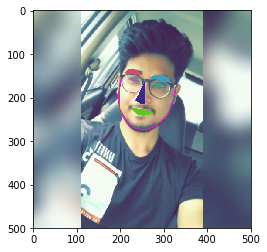

In [24]:
for (i, rect) in enumerate(rects):
    # determine the facial landmarks for the face region, then
    # convert the landmark (x, y)-coordinates to a NumPy array
    shape = predictor(gray, rect)
    shape = shape_to_np(shape)

    # loop over the face parts individually
    for (name, (i, j)) in FACIAL_LANDMARKS_IDXS.items():
        # clone the original image so we can draw on it, then
        # display the name of the face part on the image
        clone = image.copy()
        cv2.putText(clone, name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
            0.7, (0, 0, 255), 2)

        # loop over the subset of facial landmarks, drawing the
        # specific face part
        for (x, y) in shape[i:j]:
            cv2.circle(clone, (x, y), 1, (0, 0, 255), -1)
        # extract the ROI of the face region as a separate image
        (x, y, w, h) = cv2.boundingRect(np.array([shape[i:j]]))
        roi = image[y:y + h, x:x + w]
        roi = imutils.resize(roi, width=250, inter=cv2.INTER_CUBIC)

        # show the particular face part
        data.append(roi)
        data.append(clone)
#         plt.figure(figsize = (5,5))
#         plt.imshow(roi)
#         plt.figure(figsize = (5,5))
#         plt.imshow(clone)
#         cv2.imshow("ROI", roi)
#         cv2.imshow("Image", clone)
#         cv2.waitKey(0)

    # visualize all facial landmarks with a transparent overlay
    output = visualize_facial_landmarks(image, shape)
#     cv2.imshow("Image", output)
#     cv2.waitKey(0)
    image = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
    pixels = np.array(image)
#     plt.figure(figsize = (100,10))
    plt.imshow(image)
    plt.show()

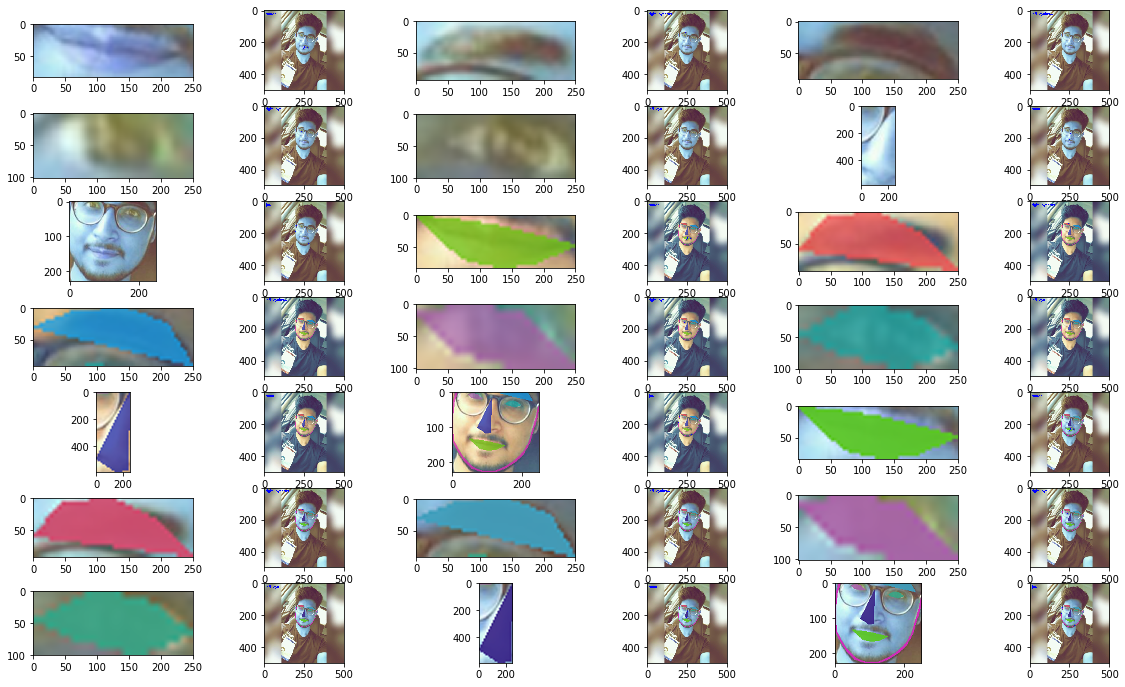

In [50]:
l= 0
row = 7
col = 6
fig, axs = plt.subplots(row,col, figsize=(20, 12))
axs = axs.flatten()
for i,ax in zip(data,axs):
    ax.imshow(i)
#     plt.show()

# Live Detection

In [54]:
from imutils.video import VideoStream
from imutils import face_utils
import time
import datetime
print("[INFO] camera sensor warming up...")
vs = VideoStream(src=0).start()
time.sleep(2.0)

# loop over the frames from the video stream
while True:
    # grab the frame from the threaded video stream, resize it to
    # have a maximum width of 400 pixels, and convert it to
    # grayscale
    frame = vs.read()
    frame = imutils.resize(frame, width=500)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # detect faces in the grayscale frame
    rects = detector(gray, 0)
    for rect in rects:
        # determine the facial landmarks for the face region, then
        # convert the facial landmark (x, y)-coordinates to a NumPy
        # array
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # loop over the (x, y)-coordinates for the facial landmarks
        # and draw them on the image
        for (x, y) in shape:
            cv2.circle(frame, (x, y), 1, (0, 0, 255), -1)

    # show the frame
    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) & 0xFF

    # if the `q` key was pressed, break from the loop
    if key == ord("q"):
        break
    # do a bit of cleanup
cv2.destroyAllWindows()
vs.stop()

[INFO] camera sensor warming up...


KeyboardInterrupt: 